In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/drive/MyDrive/AI/dataset/temperature forecasting /city_temperature.csv")
data.describe()

,State,Month,Day,Year,AvgTemperature
count,0.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,NaN,6.471169e+00,1.571776e+01,2.006108e+03,5.466785e+01
std,NaN,3.457360e+00,8.800891e+00,3.648453e+01,4.065817e+01
min,NaN,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,NaN,3.000000e+00,8.000000e+00,2.000000e+03,4.840000e+01
50%,NaN,6.000000e+00,1.600000e+01,2.007000e+03,6.450000e+01
75%,NaN,9.000000e+00,2.300000e+01,2.013000e+03,7.810000e+01
max,NaN,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1048575 non-null  object 
 1   Country         1048575 non-null  object 
 2   State           0 non-null        float64
 3   City            1048575 non-null  object 
 4   Month           1048575 non-null  int64  
 5   Day             1048575 non-null  int64  
 6   Year            1048575 non-null  int64  
 7   AvgTemperature  1048575 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 64.0+ MB


##note - Temperature is in fahrenheit

In [4]:
#find null value
print(data.isnull().sum())

Region                  0
Country                 0
State             1048575
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64


In [5]:
#according to above in column "state" is empty column
# we should drop column "state " and there is 10L+ observation over therefore  we only do the predication of mumbai city
df=data[data['City']=='Bombay (Mumbai)']
df.head()


,Region,Country,State,City,Month,Day,Year,AvgTemperature
312523,Asia,India,NaN,Bombay (Mumbai),1,1,1995,71.8
312524,Asia,India,NaN,Bombay (Mumbai),1,2,1995,72.0
312525,Asia,India,NaN,Bombay (Mumbai),1,3,1995,70.3
312526,Asia,India,NaN,Bombay (Mumbai),1,4,1995,69.7
312527,Asia,India,NaN,Bombay (Mumbai),1,5,1995,71.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9266 entries, 312523 to 321788
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          9266 non-null   object 
 1   Country         9266 non-null   object 
 2   State           0 non-null      float64
 3   City            9266 non-null   object 
 4   Month           9266 non-null   int64  
 5   Day             9266 non-null   int64  
 6   Year            9266 non-null   int64  
 7   AvgTemperature  9266 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 651.5+ KB


In [7]:
df.drop(['Region', 'Country','State', 'City'], axis=1, inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,Day,Year,AvgTemperature
312523,1,1,1995,71.8
312524,1,2,1995,72.0
312525,1,3,1995,70.3
312526,1,4,1995,69.7
312527,1,5,1995,71.3


In [8]:
# we can use 1st three columns and make new column and make that column in datatime type
#combine month and year column
df['Period'] = df['Day'].map(str) + '-' + df['Month'].map(str) + '-' + df['Year'].map(str)

df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,Day,Year,AvgTemperature,Period
312523,1,1,1995,71.8,1-1-1995
312524,1,2,1995,72.0,2-1-1995
312525,1,3,1995,70.3,3-1-1995
312526,1,4,1995,69.7,4-1-1995
312527,1,5,1995,71.3,5-1-1995


In [9]:
#drop month, day, year column and convert period columns datatype into datetime datatype
df.drop(['Month','Day','Year'], axis = 1, inplace = True)
#pd.to_datetime(data2['Period'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df.head()

,AvgTemperature,Period
312523,71.8,1-1-1995
312524,72.0,2-1-1995
312525,70.3,3-1-1995
312526,69.7,4-1-1995
312527,71.3,5-1-1995


In [11]:
# column 'period' use as a index
#data5=data5.set_index('Period')
#data5.head()

In [12]:
df['Period']=pd.to_datetime(df['Period'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9266 entries, 312523 to 321788
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   AvgTemperature  9266 non-null   float64       
 1   Period          9266 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 217.2 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


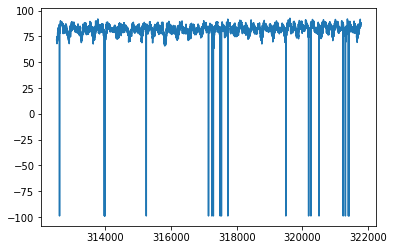

In [13]:
#take avg temperature as y variable
y= df['AvgTemperature']
#use graph to analyse the y variable
import matplotlib.pyplot as plt

y.plot()
plt.show()

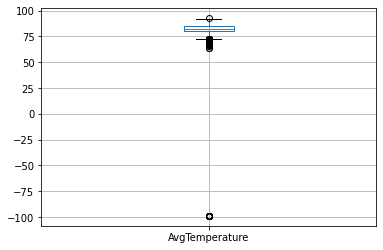

In [14]:
#according to graph we can say there is outlier present
#so now we detect the outlier and remove from our data set
boxplot = df.boxplot(column=['AvgTemperature'])  

In [15]:
#there is some temperature is at (-100) so which data is that we find it
df.describe()

,AvgTemperature
count,9266.000000
mean,81.531729
std,10.989813
min,-99.000000
25%,79.900000
50%,82.600000
75%,84.700000
max,92.600000


In [16]:
# in that describe we can observe our 25% quantile is 79.9 and our min value is -99 and from boxplot we can observe -99 is outlier so we remove it 
# but this is DateTime data type so we can't delete or remove -99 value, so we should replace that value with or mean value

df2 =df.replace(-99, 81.5)
df2.describe()

,AvgTemperature
count,9266.000000
mean,82.116123
std,3.860407
min,63.400000
25%,80.000000
50%,82.600000
75%,84.700000
max,92.600000


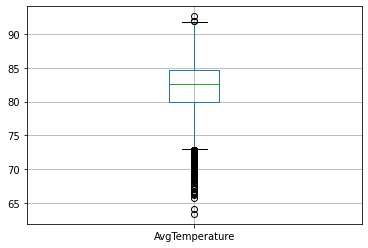

In [17]:
#now we can observe our min value is =63.4 again we plot boxplot
boxplot = df2.boxplot(column=['AvgTemperature'])

In [18]:
df2.head()

,AvgTemperature,Period
312523,71.8,1995-01-01
312524,72.0,1995-02-01
312525,70.3,1995-03-01
312526,69.7,1995-04-01
312527,71.3,1995-05-01


In [19]:
df2.dtypes

AvgTemperature           float64
Period            datetime64[ns]
dtype: object

In [20]:
#already data is sort in ascending by date
df2['Period'].min() , df2['Period'].max()

(Timestamp('1995-01-01 00:00:00'), Timestamp('2020-12-05 00:00:00'))

In [21]:
df2 = df2.reset_index()
df2.head()

,index,AvgTemperature,Period
0,312523,71.8,1995-01-01
1,312524,72.0,1995-02-01
2,312525,70.3,1995-03-01
3,312526,69.7,1995-04-01
4,312527,71.3,1995-05-01


In [22]:
df2=df2.drop("index", axis = 1)
df2.head()

,AvgTemperature,Period
0,71.8,1995-01-01
1,72.0,1995-02-01
2,70.3,1995-03-01
3,69.7,1995-04-01
4,71.3,1995-05-01


In [23]:
df2=df2.set_index("Period")
df2.head()

,AvgTemperature
Period,
1995-01-01,71.8
1995-02-01,72.0
1995-03-01,70.3
1995-04-01,69.7
1995-05-01,71.3


In [24]:
y = df2['AvgTemperature'].resample('M').mean()
#i am taking monthly data as a mean of in same data

In [25]:
print(y.shape)

(312,)


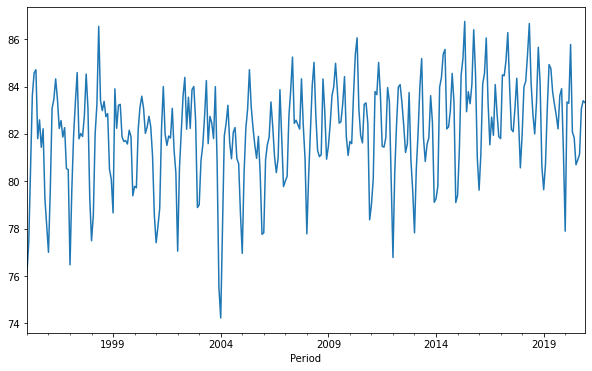

In [26]:
y.plot(figsize=(10,6))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

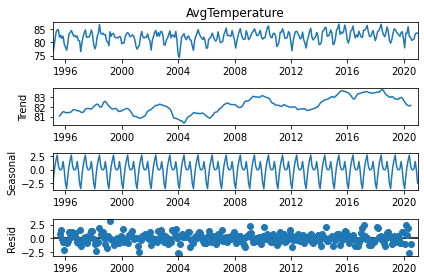

In [27]:
#for checking seasonality and trend
import statsmodels.api as sm
d=sm.tsa.seasonal_decompose(y)
fig = d.plot()
plt.show

In [28]:
#above graph show this data is seasonality data period for season is 12 month
#do train test split
train= y.loc[:'2015-12-31']
test = y.loc['2016-01-01':]

In [29]:
train.shape

(252,)

In [30]:
test.shape

(60,)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  # Negative indices (that lie in the Index)


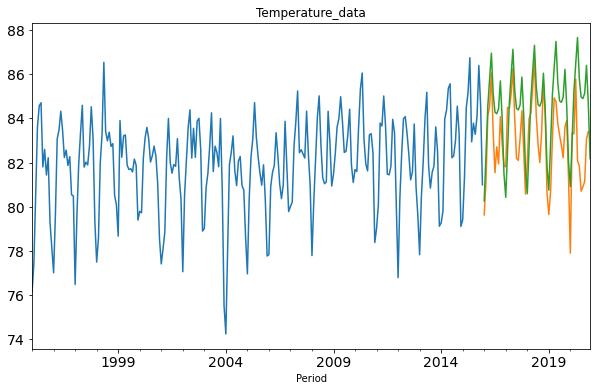

In [56]:
#split data in 80%-20% and train model
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
fit1 = ExponentialSmoothing(train, seasonal_periods=12,trend = 'mul', seasonal = 'mul').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title = 'Temperature_train', fontsize = 14)
test.plot(figsize =(10,6), title = 'Temperature_test', fontsize = 14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title = 'Temperature_data', fontsize = 14)
plt.show()
#blue color line is for train data
#orange colour line is for test data
#green colour line is for predicate data

In [57]:
#find out Accuracy
mape = np.mean(np.abs((test - Holt_Winter_df['Holt_Winter'])/test))*100
print('Mean Absolute Percentage Error',mape)
print('Accuracy ',100-mape)


Mean Absolute Percentage Error 2.050813428057391
Accuracy  97.9491865719426


In [33]:
#try Sarimax model
#find best model parameter
!pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(y, start_p=0, max_p=3, d = None, max_d=2, start_q=0, max_q=3, satrt_P=3,D=None, max_D=2, start_Q=0,max_Q=3, max_order=10, m=12, seasonal=True, information_criterion = 'aic',test='adf', trace=True, random_state=10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 42.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1085.146, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1348.095, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1028.007, Time=1.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1126.717, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3638.274, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1206.189, Time=0.15 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1030.206, Time=3.79 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1030.940, Time=1.30 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1108.753, Time=0.72 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1034.070, Time=3.41 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1064.283, Time=1.56 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1052.091, Time=2.06 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1043.048, Time=1.10 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1077.292, Time=1.82 sec
 ARIMA(1,0,0)(1,0,0

In [34]:
#best model parameter for our data
model

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

In [45]:
#use above data for sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order = (1,3,0), seasonal_order=(1,0,0,12)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  # Negative indices (that lie in the Index)


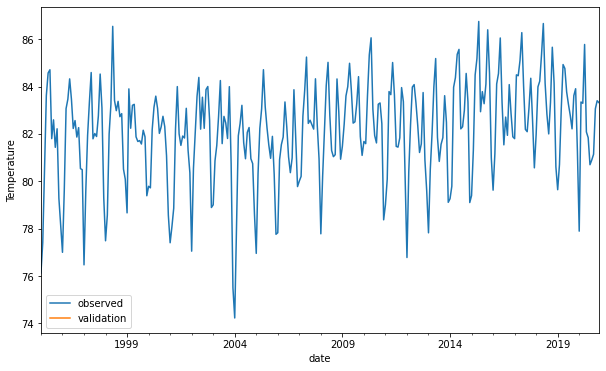

In [46]:
pred = model.get_prediction(start = pd.to_datetime('2016-01-01'))
plt.figure(figsize=(10,6))
ax=y['1995-01-01':].plot(label = "observed")
pred.predicted_mean.plot(ax=ax, label = 'validation')
ax.set_xlabel('date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

In [47]:
mape = np.mean(np.abs((test - pred.predicted_mean)/test))*100
print('Mean Absolute Percentage Error',mape)
print('Accuracy ',100-mape)

Mean Absolute Percentage Error 2.6103790945131364
Accuracy  97.38962090548686


## Accuracy
1. Holt-winter model = 97.95%
2. SARIMAX model  = 97.38%

so we go for Holt-winter model

In [60]:
#mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print (rms)

2.0162377249772785


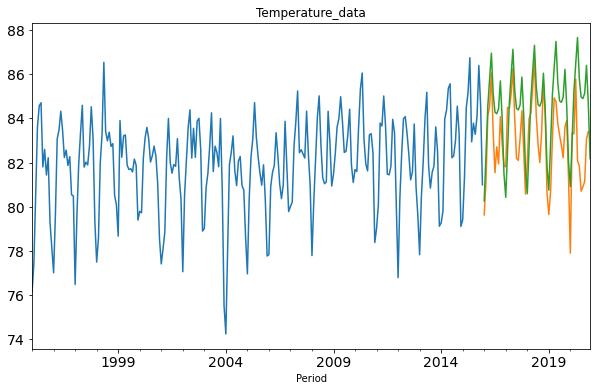

In [62]:
#result graph

train.plot(figsize=(10,6), title = 'Temperature_train', fontsize = 14)
test.plot(figsize =(10,6), title = 'Temperature_test', fontsize = 14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title = 'Temperature_data', fontsize = 14)
plt.show()
#blue color line is for train data
#orange colour line is for test data
#green colour line is for predicate data